# Data Pre-Processing and EDA

## COVID-19 Dataset

The goal is to predict the urgency with which a COVID-19 patient will need to be admitted to the hospital from the time of onset of symptoms. The dataset contains some COVID-19 symptoms and demographic information.  This dataset was collected in the peak of a COVID-19 wave and hence may have some errors and missing data. The aim of this exercise is to pre-process the given data and create a clean dataset to use for modelling and inference. Additionally, you are required to perform some EDA to understand the data better. 

Primary predictors:

age 

sex

cough, fever, chills, sore_throat, headache, fatigue. For each: 1 if have symptom, 0 if no symptom 

Response variable:  Urgency of admission where 

1 => High Urgency which means the patient was admitted within 1 day from the onset of symptoms

0 => No Urgency - everyone else 

In [1]:
# Import necessary libraries

# Your code here
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer

In [2]:
# Read the datafile "covid.csv"
df = pd.read_csv('covid.csv')

# Take a quick look at the dataframe
df.head()


,age,sex,cough,fever,chills,sore_throat,headache,fatigue,Urgency
0,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,49.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,59.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0


In [3]:
# Check if there are any missing or Null values
null_values = df.isnull().sum()
print(null_values)


age             6
sex             8
cough          11
fever          15
chills          4
sore_throat     6
headache        2
fatigue         4
Urgency         0
dtype: int64


In [4]:
### edTest(test_na) ###

# Find the number of rows with missing values
num_null = df.isnull().sum(axis=1).gt(0).sum()
print("Number of rows with null values:", num_null)


Number of rows with null values: 37


In [5]:
# kNN impute the missing data
# Use a k value of 5

# Your code here
knn = KNNImputer(n_neighbors=5)

In [6]:
### edTest(test_impute) ###
# Replace the original dataframe with the imputed data, continue to use df for the dataframe

# Your code here
# Separate the response variable
X = df.drop('Urgency', axis=1)
y = df['Urgency']

# Create an instance of KNNImputer
knn_imputer = KNNImputer()

# Fit the imputer on data excluding the response variable and transform
X_imputed = knn_imputer.fit_transform(X)

# Convert the result back to a DataFrame
X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)

# Combine the imputed data with the response variable
df = pd.concat([X_imputed_df, y.reset_index(drop=True)], axis=1)

## EDA

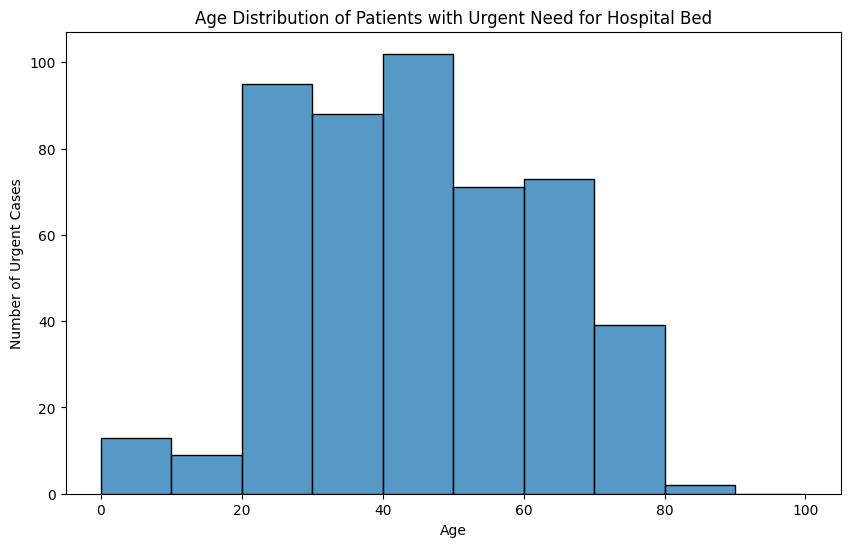

In [7]:
# Plot an appropriate graph to answer the following question
# Your code here
urgent_cases = df[df['Urgency'] == 1]

# Plot a histogram of the age distribution of urgent cases
bins=[0,10,20,30,40,50,60,70,80,90,100]
plt.figure(figsize=(10,6))
sns.histplot(urgent_cases['age'], bins=bins, kde=False)
plt.title("Age Distribution of Patients with Urgent Need for Hospital Bed")
plt.xlabel("Age")
plt.ylabel("Number of Urgent Cases")
plt.show()

### ⏸ Which age group has the most urgent need for a hospital bed?

#### A. 60 - 70 

#### B. 50 - 60 

#### C. 20 - 30

#### D. 40 - 50

In [8]:
### edTest(test_chow1) ###
# Submit an answer choice as a string below (eg. if you choose option A, put 'A')
answer1 = 'D'


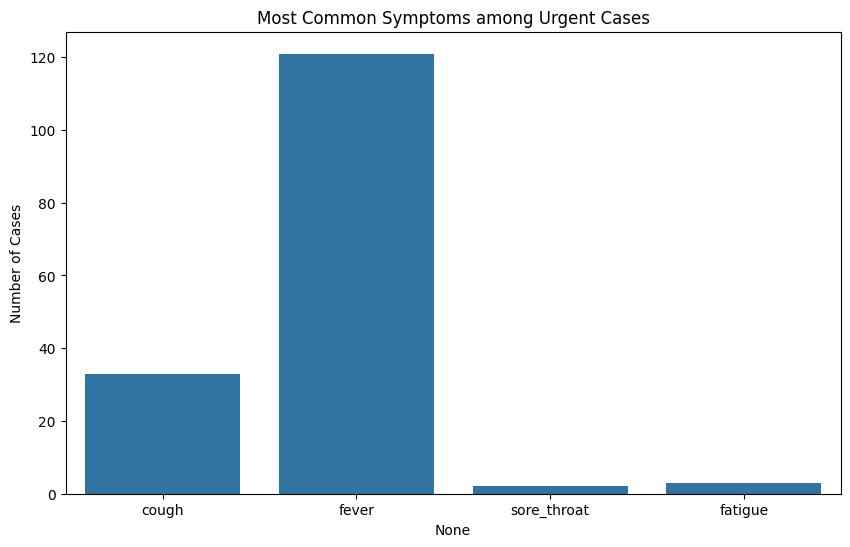

In [9]:
# Plot an appropriate graph to answer the following question    
# Your code here
urgent_cases = df[df['Urgency'] == 1]
symptoms_count = urgent_cases[['cough', 'fever', 'sore_throat', 'fatigue']].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=symptoms_count.index, y=symptoms_count.values)
plt.title('Most Common Symptoms among Urgent Cases')
plt.ylabel('Number of Cases')
plt.show()

### ⏸ Among the following symptoms, which is the most common one for patients with urgent need of hospitalization?

#### A. Cough

#### B. Fever

#### C. Sore Throat

#### D. Fatigue

In [10]:
### edTest(test_chow2) ###
# Submit an answer choice as a string below (eg. if you choose option A, put 'A')
answer2 = 'B'


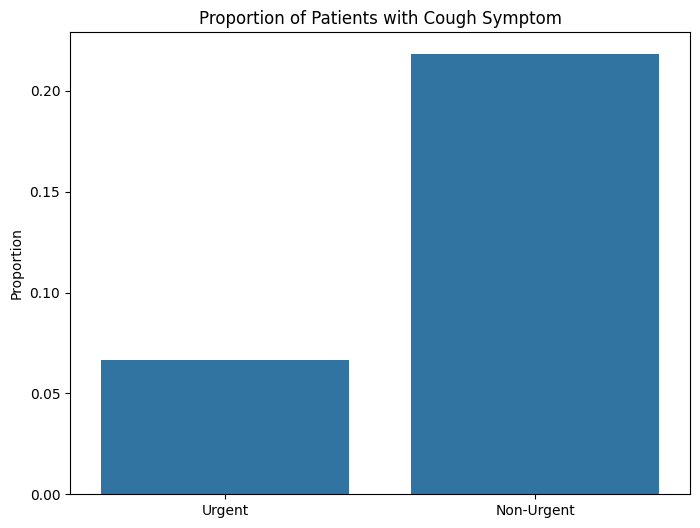

In [11]:
# Plot an appropriate graph to answer the following question    
# Your code here
urgent_cough_prop = df[df['Urgency'] == 1]['cough'].mean()
non_urgent_cough_prop = df[df['Urgency'] == 0]['cough'].mean()
# Data
groups = ['Urgent', 'Non-Urgent']
proportions = [urgent_cough_prop, non_urgent_cough_prop]

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=groups, y=proportions)
plt.title('Proportion of Patients with Cough Symptom')
plt.ylabel('Proportion')
plt.show()

### ⏸ As compared to patients with urgent need of hospitalization, patients with no urgency have cough as a more common symptom?

#### A. True

#### B. False

#### C. It is the same

#### D. Cannot say

In [12]:
### edTest(test_chow3) ###
# Submit an answer choice as a string below (eg. if you choose option A, put 'A')
answer3 = 'A'


### Train Test Split

In [13]:
### edTest(test_split) ###
# Split the data into train and test sets with 70% for training
# Use random state of 60 and set of data as the train split

# Your code here
df_train, df_test = train_test_split(df, train_size=0.7, random_state=60)

In [14]:
# Save the train data into a csv called "covid_train.csv"
# Remember to not include the default indices
df_train.to_csv('covid_train.csv', index=False)

# Save the test data into a csv called "covid_test.csv"
# Remember to not include the default indices
df_test.to_csv('covid_test.csv', index=False)
